In [2]:
# Importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Problem Statement
* You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

## Task
* Given a person’s credit-related information, build a machine learning model that can classify the credit score.



In [79]:
train=pd.read_csv('train.csv')

In [80]:
test=pd.read_csv('test.csv')

In [4]:
# Combining test and train in a single dataframe
df=pd.concat([train,test],ignore_index=True,sort=False)

In [5]:
#First five rows of combined data
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
#Shape of the data
df.shape

(150000, 28)

In [7]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [8]:
# Summary statistics
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000


In [9]:
# Checking for missing values
df.isnull().sum().sort_values()

ID                              0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Changed_Credit_Limit            0
Delay_from_due_date             0
Total_EMI_per_month             0
Interest_Rate                   0
Num_Credit_Card                 0
Num_of_Loan                     0
Payment_Behaviour               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Customer_ID                     0
Num_Bank_Accounts               0
Monthly_Balance              1762
Num_Credit_Inquiries         3000
Amount_invested_monthly      6750
Num_of_Delayed_Payment      10500
Credit_History_Age          13500
Name                        15000
Type_of_Loan                17112
Monthly_Inhand_Salary       22500
Credit_Score                50000
dtype: int64

In [10]:
# We would be doing the data cleaning before procedding with our statistical analysis

## Data Cleaning and Handling of Missing Values

In [11]:
# Dropping few reduntant columns
df.drop(columns=['Name','ID','SSN'],inplace=True)

In [12]:
# The Num_Of_loan column had underscores and some special characters
# Here we are extracting just the numeric part of each string
def take_number(x):
    s=''
    for i in x:
        if i.isnumeric():
            s=s+i
    return s
df.Num_of_Loan=df.Num_of_Loan.apply(take_number)

In [13]:
# Changing the datatype of num_of_loan
df.Num_of_Loan=df.Num_of_Loan.astype('int')

In [14]:
ssn=df.groupby('Customer_ID')['Num_of_Loan'].median().index
vals=df.groupby('Customer_ID')['Num_of_Loan'].median().values

In [15]:
# Here we are going to change the Num of loan with the groupwise median
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Num_of_Loan']=y

In [16]:
# The Annual_Income column had a similar underscore problems like num_of_loan column
# here we would extract the numeric as well as the decimal part of the string
def take_decimal(x):
    s=''
    for i in x:
        if (i.isnumeric()) or (i=='.'):
            s=s+i
    return s
df.Annual_Income=df.Annual_Income.apply(take_decimal)

In [17]:
# changing the datatype of annual income
df.Annual_Income=df.Annual_Income.astype('float')

In [18]:
# Outstanding debt has the same problem as annual income
# we would call the function take_decimal and apply the same imputation that we did before in annual income
df.Outstanding_Debt=df.Outstanding_Debt.apply(take_decimal)

In [19]:
# Changing the datatype of outstanding debt to float
df.Outstanding_Debt=df.Outstanding_Debt.astype('float')
# Outstanding debt is now cleaned

In [20]:
ssn=df.groupby('Customer_ID')['Annual_Income'].median().index

In [21]:
nums=df.groupby('Customer_ID')['Annual_Income'].median().values

In [22]:
# Here we are going to replace all values in a group by the groupwise median
for x,y in zip(ssn,nums):
    df.loc[df.Customer_ID==x,'Annual_Income']=y
# Annual Income is now cleaned

In [23]:
# To clean the column age we would call the function take_number. Then we would handle anomalies in the column
df.Age=df.Age.apply(take_number)  

In [24]:
# Changing the datatype of age column
df.Age=df.Age.astype('int')

In [25]:
ssn=df.groupby('Customer_ID')['Age'].median().index
vals=df.groupby('Customer_ID')['Age'].median().values

In [26]:
# Here we would handle anomalies by imputing groupwise median in the age column
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Age']=y
# Age column is now cleaned

In [27]:
# Changing the datatype of age column again to int
df.Age=df.Age.astype('int')

In [28]:
# We see that in the interest rate column it is of datatype int but has anomalies
# we would try to handle them
ssn=df.groupby('Customer_ID')['Interest_Rate'].median().index
vals=df.groupby('Customer_ID')['Interest_Rate'].median().values

In [29]:
# We would apply groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Interest_Rate']=y
# Interest Rate column is now cleaned

In [30]:
# We see that in the column num_credit_card there are a few anomalies
# to handle that we would apply groupwise median imputation to fix it
ssn=df.groupby('Customer_ID')['Num_Credit_Card'].median().index
vals=df.groupby('Customer_ID')['Num_Credit_Card'].median().values

In [31]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Num_Credit_Card']=y
# Num_Credit_Card column is now cleaned

In [32]:
# Changing the datatype to int
df.Num_Credit_Card=df.Num_Credit_Card.astype('int')

In [33]:
# In Num_bank_accounts we see that there are a lot of anomalies
# We would have a similar approach as we had above with groupwise median imputation
ssn=df.groupby('Customer_ID')['Num_Bank_Accounts'].median().index
vals=df.groupby('Customer_ID')['Num_Bank_Accounts'].median().values

In [34]:
# Groupwise median imputation'
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Num_Bank_Accounts']=y
# Num_Bank_Accounts is now cleaned

In [35]:
# Changing the datatype of Num_Bank_Accounts
df.Num_Bank_Accounts=df.Num_Bank_Accounts.astype('int')

In [36]:
# Changed_Credit_Limit has anomalies namely a string object '_'. We would first replace this with none values and then after changing the datatype
# We would apply groupwise median imputation
df.Changed_Credit_Limit=df.Changed_Credit_Limit.replace(to_replace='_',value=np.nan)

In [37]:
# Changing the datatype
df.Changed_Credit_Limit=df.Changed_Credit_Limit.astype('float')

In [38]:
ssn=df.groupby('Customer_ID')['Changed_Credit_Limit'].median().index
vals=df.groupby('Customer_ID')['Changed_Credit_Limit'].median().values

In [39]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Changed_Credit_Limit']=y
# Changed Credit Limit column is now cleaned

In [40]:
# The column monthly balance has the wrong datatype and has weird values
# We would call the take decimal fucntion we made before then we would change the datatype
# Then we would use groupwise median imputation to handle the weird values
df.Monthly_Balance=df.Monthly_Balance.fillna('0.0') # Filling missing values

In [41]:
# Taking only the numeric and decimal part of the strings
def take(x):
    s=''
    for i in str(x):
        if (i.isnumeric()) or (i=='.'):
            s=s+i
    return s
df.Monthly_Balance=df.Monthly_Balance.apply(take)      

In [42]:
# Changing the datatype
df.Monthly_Balance=df.Monthly_Balance.astype('float')

In [43]:
df.loc[df.Monthly_Balance>1700] # here we saw that the anomalous entries are above the threshold of 1700.
# we will handle these with median imputation

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,CUS_0x9885,February,17,Developer,41086.400,3660.866667,3,4,6,7,...,Standard,113.98,34.826541,11 Years and 6 Months,Yes,145.544320,201.1429928919469,Low_spent_Medium_value_payments,3.333333e+26,Standard
26177,CUS_0x5a90,February,45,Engineer,29728.310,2551.359167,3,4,6,2,...,Good,917.00,38.198076,31 Years and 9 Months,No,34.496445,198.6115126951797,Low_spent_Large_value_payments,3.333333e+26,Good
29158,CUS_0x288d,July,55,Lawyer,30748.930,2572.410833,1,6,12,2,...,Good,860.97,40.634250,19 Years and 5 Months,No,43.727774,79.07180674947499,High_spent_Small_value_payments,3.333333e+26,Standard
35570,CUS_0x85e9,March,45,_______,20929.295,1704.107917,5,3,9,3,...,_,858.09,33.943626,21 Years and 7 Months,No,13798.000000,220.30455197823662,Low_spent_Small_value_payments,3.333333e+26,Standard
38622,CUS_0x2b77,July,21,Doctor,15167.620,1471.968333,4,5,3,1,...,Good,847.03,28.541848,NaN,NM,9.930809,128.87587207680795,Low_spent_Small_value_payments,3.333333e+26,Standard
60009,CUS_0xc06e,February,30,Journalist,92114.680,7811.223333,3,4,8,1,...,Standard,820.52,39.089475,20 Years and 10 Months,Yes,54.219664,NaN,High_spent_Large_value_payments,3.333333e+26,Standard
75251,CUS_0x57f3,April,29,Mechanic,60904.590,NaN,3,4,12,2,...,Standard,2441.47,29.878716,12 Years and 11 Months,Yes,61.525140,394.8939566733383,Low_spent_Small_value_payments,3.333333e+26,Standard
82918,CUS_0x41bf,July,44,Journalist,61990.520,4900.876667,10,10,25,9,...,Bad,3618.91,37.718591,13 Years and 8 Months,NM,355.143396,194.28348839148083,Low_spent_Small_value_payments,3.333333e+26,Standard
83255,CUS_0x2f7e,August,31,Doctor,126353.040,10635.420000,4,7,19,2,...,_,859.77,28.442867,31 Years and 9 Months,No,167.043910,549.7661392945339,Low_spent_Medium_value_payments,3.333333e+26,Poor
111363,CUS_0x4379,December,48,Entrepreneur,19204.250,1660.354167,5,7,13,3,...,Standard,504.06,30.801844,30 Years and 6 Months,No,38015.000000,NaN,Low_spent_Medium_value_payments,3.333333e+26,NaN


In [44]:
ssn=df.groupby('Customer_ID')['Monthly_Balance'].median().index
vals=df.groupby('Customer_ID')['Monthly_Balance'].median().values

In [45]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Monthly_Balance>1700),'Monthly_Balance']=y

In [46]:
# Now imputing at entries we replaced null values by 0.0
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Monthly_Balance==0),'Monthly_Balance']=y
# Monthly balance column is now cleaned

In [47]:
# Total emi per month column has some anomalies which we need to clean
# we would again use the groupwise median imputation
ssn=df.groupby('Customer_ID')['Total_EMI_per_month'].median().index
vals=df.groupby('Customer_ID')['Total_EMI_per_month'].median().values

In [48]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Total_EMI_per_month']=y
# Total emi per month column is now cleaned

In [49]:
# Amount invested monthly has null values, also has wrong datatype and has anomalies
# First we will fill the null values
# Then after changing the data type we will do groupwise median imputation
df.Amount_invested_monthly.fillna(value='10000',inplace=True)

In [50]:
# Now we will call the fucktion take where we would only take the numeric part of the strings
df.Amount_invested_monthly=df.Amount_invested_monthly.apply(take)

In [51]:
# Changing the datatype of the column
df.Amount_invested_monthly=df.Amount_invested_monthly.astype('float')

In [52]:
np.quantile(df.Amount_invested_monthly,0.911)

1451.7326654742667

In [53]:
# Thus we see that the anomalies our occuring above the value of 1452
# So we would apply groupwise median in these values
df.loc[df.Amount_invested_monthly>1452]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,CUS_0x2dbc,March,34,_______,143162.64,NaN,1,5,8,3,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good
23,CUS_0x2dbc,August,34,Engineer,143162.64,12187.220000,1,5,8,3,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,CUS_0xb891,May,55,Entrepreneur,30689.89,2612.490833,2,5,4,1,...,Good,632.46,41.154317,17 Years and 7 Months,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard
60,CUS_0x5407,May,30,_______,34081.38,2611.115000,8,7,15,3,...,_,1704.18,30.206214,14 Years and 11 Months,Yes,70.478333,10000.0,High_spent_Large_value_payments,397.228355,Standard
61,CUS_0x5407,June,30,Media_Manager,34081.38,2611.115000,8,7,15,3,...,Standard,1704.18,31.170872,15 Years and 0 Months,Yes,70.478333,10000.0,!@9#%8,410.674366,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149945,CUS_0x89aa,October,38,Manager,85744.12,7125.343333,6,7,11,2,...,Standard,717.79,39.847437,16 Years and 0 Months,Yes,72.099176,10000.0,Low_spent_Small_value_payments,421.112538,NaN
149952,CUS_0xa053,September,39,Writer,87695.34,7337.945000,2,7,7,0,...,Good,361.68,37.329252,19 Years and 9 Months,No,0.000000,10000.0,!@9#%8,859.006805,NaN
149974,CUS_0x51b3,November,33,Media_Manager,59146.36,4908.863333,3,6,6,1,...,_,418.03,39.071953,20 Years and 11 Months,No,26.778419,10000.0,Low_spent_Medium_value_payments,292.323101,NaN
149989,CUS_0xaf61,October,50,Writer,37188.10,3097.008333,1,4,5,3,...,Good,620.64,23.986021,30 Years and 6 Months,No,84.205949,10000.0,Low_spent_Large_value_payments,270.754039,NaN


In [54]:
ssn=df.groupby('Customer_ID')['Amount_invested_monthly'].median().index
vals=df.groupby('Customer_ID')['Amount_invested_monthly'].median().values

In [55]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Amount_invested_monthly>1452),'Amount_invested_monthly']=y
# Amounted invested monthly is now clean

In [56]:
# Credit mix has wierd values like '_' which we need to handle
# Here we would apply groupwise mode to handle the anomalies
ssn=df.groupby('Customer_ID')['Credit_Mix'].agg(lambda x: x.value_counts().index[0]).index
vals=df.groupby('Customer_ID')['Credit_Mix'].agg(lambda x: x.value_counts().index[0]).values

In [57]:
# Groupwise mode imputation
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Credit_Mix=='_'),'Credit_Mix']=y

In [58]:
df.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad', '_'], dtype=object)

In [59]:
# There are still some values left with '_' as the entries
# We would replace them by the whole column mode
df.Credit_Mix.replace(to_replace='_',value='Standard',inplace=True)

In [60]:
df.Credit_Mix.unique()
# Credit_Mix is now cleaned

array(['Good', 'Standard', 'Bad'], dtype=object)

In [61]:
# Occupation has a similar problem like credit mix, so we would apply groupwise mode imputation here as well
# First we will change the '______' values to null
# Then do the groupwise mode imputation
df.Occupation=df.Occupation.replace(to_replace='_______',value=np.nan)

In [62]:
df.Occupation.isnull().sum()

10500

In [63]:
ssn=df.groupby('Customer_ID')['Occupation'].agg(lambda x: x.value_counts().index[0]).index
vals=df.groupby('Customer_ID')['Occupation'].agg(lambda x: x.value_counts().index[0]).values

In [64]:
# Groupwise mode imputation
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Occupation']=y
# Occupation column is now cleaned

In [65]:
# In Credit history age we would be taking the years from the strings
def take_years(x):
    if x is not None:
        return str(x).strip()[0:2]
df.Credit_History_Age=df.Credit_History_Age.apply(take_years)

In [66]:
# Now we would replace the values 'na' with 0 wherever they are present in the column
# Then after changing the datatype we will do groupwise median imputation
df.Credit_History_Age.replace(to_replace='na',value='0.0',inplace=True)

In [67]:
df.Credit_History_Age.replace(to_replace='0.0',value='0',inplace=True)

In [68]:
# Changing the datatype
df.Credit_History_Age=df.Credit_History_Age.astype('int')

In [69]:
ssn=df.groupby('Customer_ID')['Credit_History_Age'].median().index
vals=df.groupby('Customer_ID')['Credit_History_Age'].median().values

In [70]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Credit_History_Age==0),'Credit_History_Age']=y
# Credit history age column is now cleaned

In [71]:
# Monthly Inhand Salary has missing values
# Here would would do median imputation to fill those values
ssn=df.groupby('Customer_ID')['Monthly_Inhand_Salary'].median().index
vals=df.groupby('Customer_ID')['Monthly_Inhand_Salary'].median().values

In [72]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Monthly_Inhand_Salary']=y

In [73]:
#Num_Credit Enquiries has anomalous entries
# We would fill the null values and replace the anomalies using groupwise median imputation
ssn=df.groupby('Customer_ID')['Num_Credit_Inquiries'].median().index
vals=df.groupby('Customer_ID')['Num_Credit_Inquiries'].median().values

In [74]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Num_Credit_Inquiries']=y
# Num_Credit_inquiries column is now cleaned

In [75]:
# Changing the datatype to int
df.Num_Credit_Inquiries=df.Num_Credit_Inquiries.astype('int')

In [76]:
# The column Num_of_delayed_Payment has anomalies and null values
# We will first fill the null values with 0
# Then we will change the datatype and then do groupwise median imputation
df.Num_of_Delayed_Payment.fillna(value='0',inplace=True)

In [77]:
# Now we will take the numeric parts from the strings in the column
df.Num_of_Delayed_Payment=df.Num_of_Delayed_Payment.apply(take_number)

In [78]:
# Changing the datatype of the column
df.Num_of_Delayed_Payment=df.Num_of_Delayed_Payment.astype('int')

In [79]:
np.quantile(df.Num_of_Delayed_Payment,0.992)
# Here we see that the column starts having anomalies after 28
# We will use groupwise median imputation to handle these and also
# to handle the 0 values we added in the column

28.0

In [80]:
ssn=df.groupby('Customer_ID')['Num_of_Delayed_Payment'].median().index
vals=df.groupby('Customer_ID')['Num_of_Delayed_Payment'].median().values

In [81]:
# Groupwise median imputation
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & ((df.Num_of_Delayed_Payment==0) | (df.Num_of_Delayed_Payment>28)),'Num_of_Delayed_Payment']=y

In [82]:
# Changing the datatype to int because the median imputation caused it to become float
df.Num_of_Delayed_Payment=df.Num_of_Delayed_Payment.astype('int')
# Num_of_Delayed_Payment is now clean

In [83]:
# For now we will drop the column type of loan because we aren't able to figure out patterns from it
# with respect to other columns
df.drop(columns='Type_of_Loan',inplace=True)

In [84]:
# Now we would first clean the column
df.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [85]:
behave_list=['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments']

In [86]:
# Here we would replace the anomalous value with the column mode
def remove_anomaly(x):
    if x in behave_list:
        return x
    else:
        return 'Low_spent_Small_value_payments'
df.Payment_Behaviour=df.Payment_Behaviour.apply(remove_anomaly)

In [87]:
df.Payment_Behaviour.unique()
# The column is now clean

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [108]:
# Payment of Min amount columns has anomalous values 'NM'
# We would handle these with the help of groupwise mode imputaion
# First we would replace the NM values with null values
df.Payment_of_Min_Amount.replace(to_replace='NM',value=np.nan,inplace=True)

In [115]:
# Now we would impute the missing values with groupwise mode
ssn=df.groupby('Customer_ID')['Payment_of_Min_Amount'].agg(lambda x : x.value_counts().index[0]).index
vals=df.groupby('Customer_ID')['Payment_of_Min_Amount'].agg(lambda x : x.value_counts().index[0]).values

In [118]:
# Groupwise mode imputation
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Payment_of_Min_Amount.isnull()),'Payment_of_Min_Amount']=y

In [119]:
df.Payment_of_Min_Amount.value_counts()
# Payment of min amount column is now cleaned

Yes    89148
No     60852
Name: Payment_of_Min_Amount, dtype: int64

In [120]:
# Now dropping the customer id column
df.drop(columns='Customer_ID',inplace=True)

In [121]:
# Data Cleaning and Handling of missing Values is now complete

In [122]:
df.to_csv('Cleaned_data.csv') # Saving the cleaned data set for future use

## Checking the Cleaned Data

In [92]:
# We would first go through some basic data viewing and then start our Univariate Analysis

In [140]:
df=pd.read_csv('Cleaned_data.csv')

In [141]:
# First five rows of the combined table
df.head()

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,1,February,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.944960,22.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,March,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3,April,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [142]:
# Dropping the extra index column
df.drop(columns='Unnamed: 0',inplace=True)

In [143]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     150000 non-null  object 
 1   Age                       150000 non-null  int64  
 2   Occupation                150000 non-null  object 
 3   Annual_Income             150000 non-null  float64
 4   Monthly_Inhand_Salary     150000 non-null  float64
 5   Num_Bank_Accounts         150000 non-null  int64  
 6   Num_Credit_Card           150000 non-null  int64  
 7   Interest_Rate             150000 non-null  int64  
 8   Num_of_Loan               150000 non-null  int64  
 9   Delay_from_due_date       150000 non-null  int64  
 10  Num_of_Delayed_Payment    150000 non-null  int64  
 11  Changed_Credit_Limit      150000 non-null  float64
 12  Num_Credit_Inquiries      150000 non-null  int64  
 13  Credit_Mix                150000 non-null  o

In [144]:
# Shape of the data
df.shape

(150000, 23)

In [145]:
# Summary Statistics
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,33.448320,50505.123449,4192.026608,5.367120,5.532320,14.532080,3.532880,21.063400,13.337173,10.395543,6.282160,1426.220376,32.283309,18.133047,113.698500,197.016710,403.067263
std,10.762413,38299.358260,3182.331243,2.593852,2.068474,8.741316,2.446352,14.860154,6.243035,6.510172,3.937036,1155.127101,5.113315,8.314092,143.508014,208.907525,214.058875
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.500000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19342.972500,1625.588021,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.500000,3.000000,566.072500,28.054731,12.000000,30.076790,75.056136,270.192911
50%,33.000000,36999.705000,3089.544583,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.340000,6.000000,1166.155000,32.297058,18.000000,68.237717,132.022381,337.126792
75%,42.000000,71683.470000,5950.535833,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.670000,9.000000,1945.962500,36.487954,25.000000,153.421445,239.898964,471.538273
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,67.000000,28.000000,29.980000,17.000000,4998.070000,50.000000,34.000000,1779.103254,5621.077265,1606.518192


In [146]:
# Corelation Dataframe
df.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.091381,0.090328,-0.190467,-0.148263,-0.217803,-0.213570,-0.174168,-0.184240,-0.161184,-0.247199,-0.202526,0.028376,0.234380,-0.035483,0.056205,0.117211
Annual_Income,0.091381,1.000000,0.998004,-0.283953,-0.217672,-0.302352,-0.255560,-0.250041,-0.285897,-0.183684,-0.276468,-0.269319,0.172570,0.272086,0.443643,0.582042,0.703699
Monthly_Inhand_Salary,0.090328,0.998004,1.000000,-0.282819,-0.216495,-0.301587,-0.253880,-0.249164,-0.284756,-0.183325,-0.275553,-0.268870,0.172698,0.270951,0.421458,0.582233,0.704561
Num_Bank_Accounts,-0.190467,-0.283953,-0.282819,1.000000,0.442820,0.583804,0.472045,0.560267,0.601128,0.344913,0.510709,0.506642,-0.072021,-0.484026,0.028297,-0.163988,-0.303034
Num_Credit_Card,-0.148263,-0.217672,-0.216495,0.442820,1.000000,0.497159,0.417222,0.479516,0.423144,0.262922,0.450774,0.489657,-0.055573,-0.415574,0.040381,-0.133338,-0.241774
Interest_Rate,-0.217803,-0.302352,-0.301587,0.583804,0.497159,1.000000,0.559156,0.589073,0.572013,0.382517,0.621838,0.629414,-0.073693,-0.575622,0.047161,-0.180363,-0.331076
Num_of_Loan,-0.213570,-0.255560,-0.253880,0.472045,0.417222,0.559156,1.000000,0.501336,0.475125,0.386806,0.554654,0.638713,-0.102316,-0.605049,0.281045,-0.154346,-0.436274
Delay_from_due_date,-0.174168,-0.250041,-0.249164,0.560267,0.479516,0.589073,0.501336,1.000000,0.542806,0.307437,0.532508,0.571650,-0.065657,-0.490794,0.058445,-0.147018,-0.284695
Num_of_Delayed_Payment,-0.184240,-0.285897,-0.284756,0.601128,0.423144,0.572013,0.475125,0.542806,1.000000,0.340890,0.494762,0.505924,-0.073202,-0.482639,0.033188,-0.165115,-0.308598
Changed_Credit_Limit,-0.161184,-0.183684,-0.183325,0.344913,0.262922,0.382517,0.386806,0.307437,0.340890,1.000000,0.387737,0.478267,-0.050201,-0.442491,0.051923,-0.110712,-0.216651


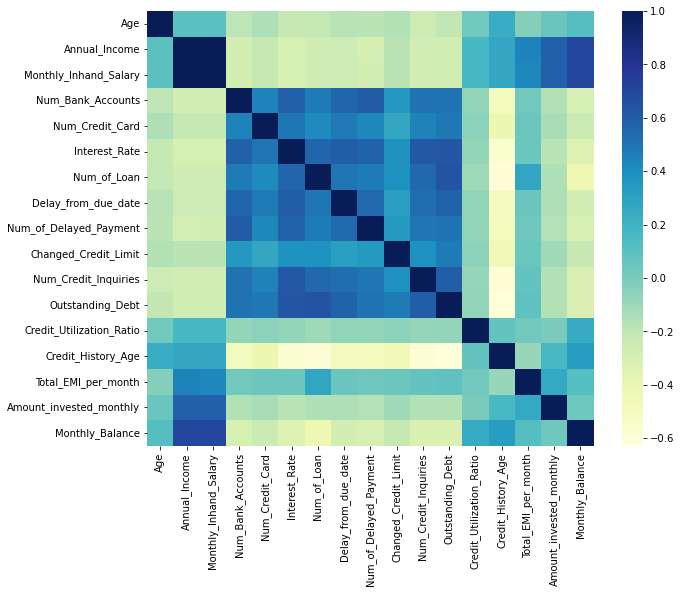

In [147]:
# Co-relation Heatmap
plt.rcParams['figure.figsize']=[10,8]
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [148]:
# Checking for missing values
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [149]:
# Checking for Duplicated rows
df.duplicated().value_counts()
# Data has no duplicate rows

False    150000
dtype: int64

## Univariate Analysis

In [150]:
# Checking for numerical columns
df.select_dtypes(include=np.number).columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [151]:
nums=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'] # Numerical columns

In [152]:
len(nums) # Checking number of graphs to be made

17

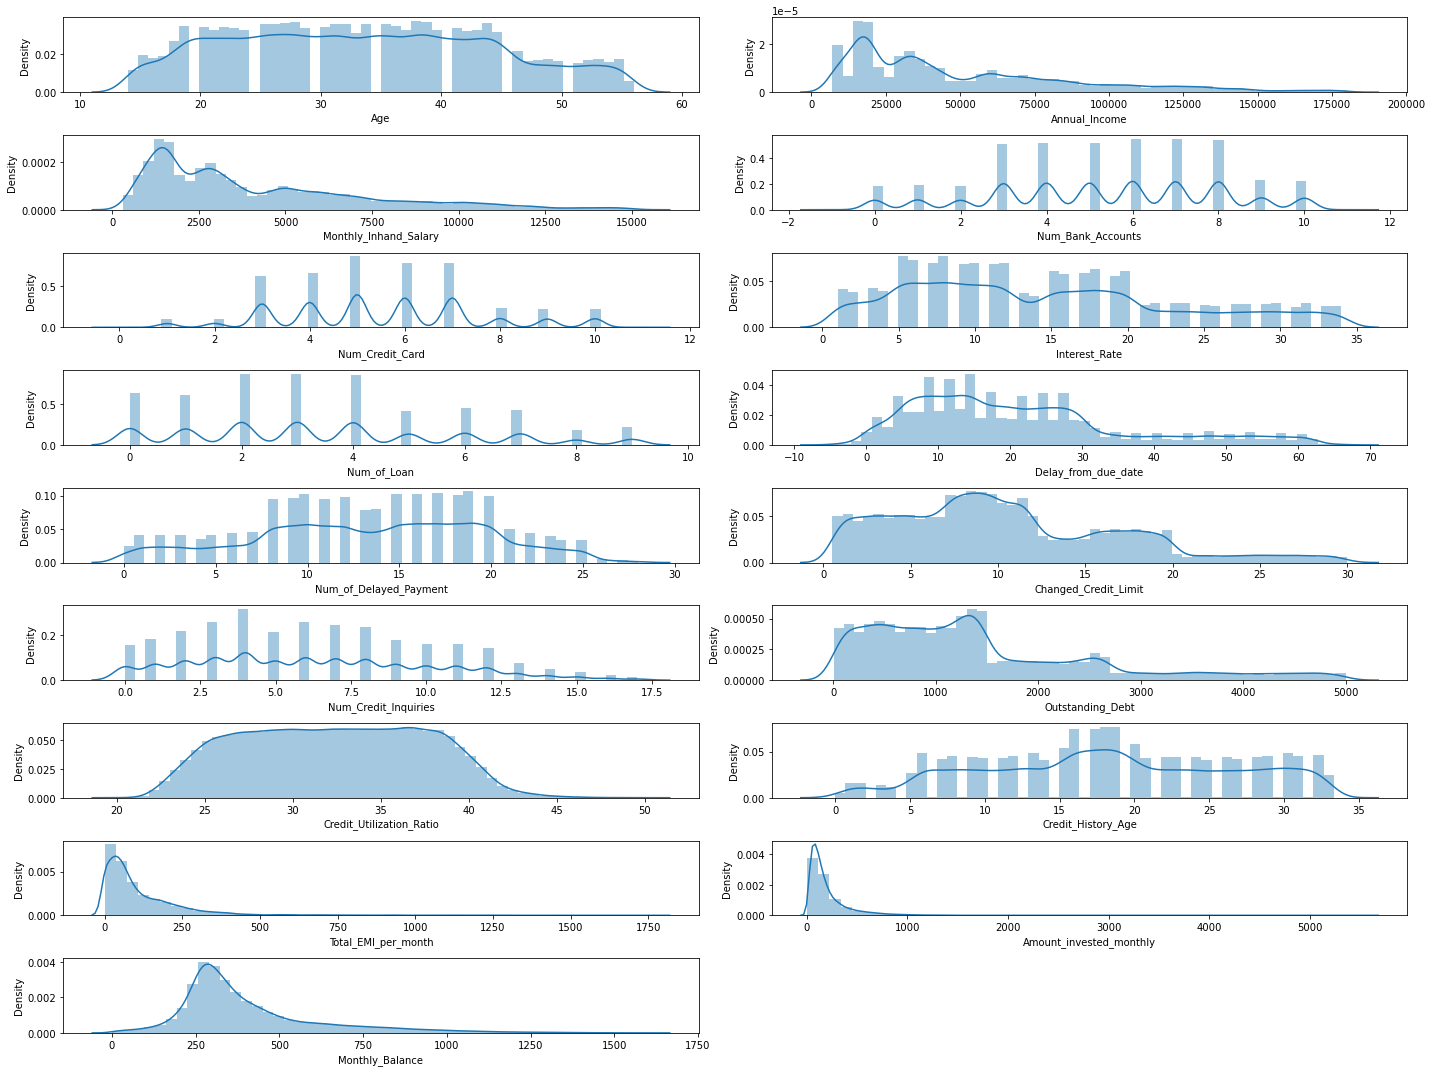

In [153]:
# Making multiple distplots
rows=9
cols=2
counter=1
plt.rcParams['figure.figsize']=[20,15]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

In [154]:
# Checking for Categorical columns
df.select_dtypes(include=object).columns

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [155]:
cat=['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'] # Categorical columns

In [156]:
len(cat)# Checking number of graphs to be made

6

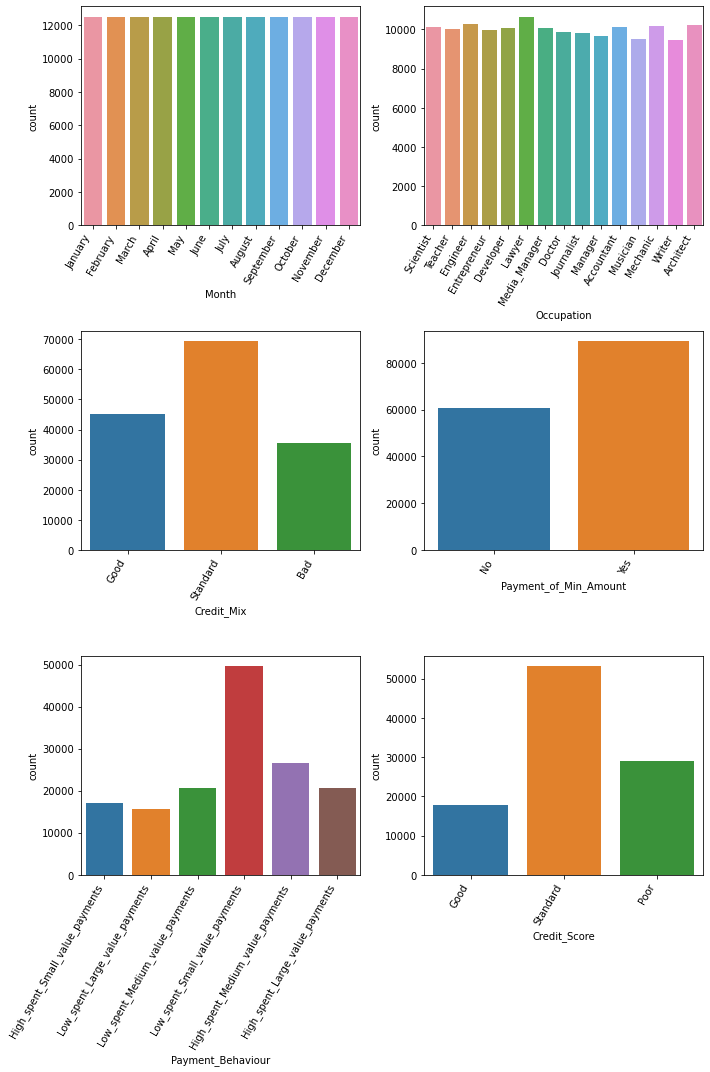

In [157]:
# Making multiple countplots
rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,15]
for i in cat:
    plt.subplot(rows,cols,counter)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

### Insights from Univariate graphs

* Distribution of age seems to be uniform
* Annual income seems to be right skewed
* Monthly Inhand Salary also seems to be right skewed
* Num of bank accounts,num of credit card, num of loan are discreet variables hence the distributions for them are multimodal
* Interest rate seems to be uniform
* Delay from dute date seems to be right skewed with the distribution seemingly uniform on the left end
* Num_of Delayed payment seems to be uniform over the data
* Changed credit limit seems to be multimodal with uniform distributions around the modal points
* Num_credit_inquires is multimodal
* Outstanding debt is right skewed, and multimodal with uniform distributions around the modal points
* Credit Utiliztion ratio is uniform over the data
* Credit History Age seems to be uniform as well
* Total emi per month is highly right skewed
* Amount invested monthly is also highly right skewed
* Monthly balance seems to be slightly right skewed
* The month and occupation columns seem to be almost equally distributed
* Standard Credit mix is the most common credit mix type
* Most people have done a payment of minimum amount
* Low spent small value payments is the most common payment behaviour
* Most people have a standard credit score

## Bivariate Analysis

In [158]:
df.select_dtypes(include=np.number).columns # For numerical columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [159]:
nums=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']# Numerical columns

In [160]:
len(nums)# checking the number of graphs to be made

17

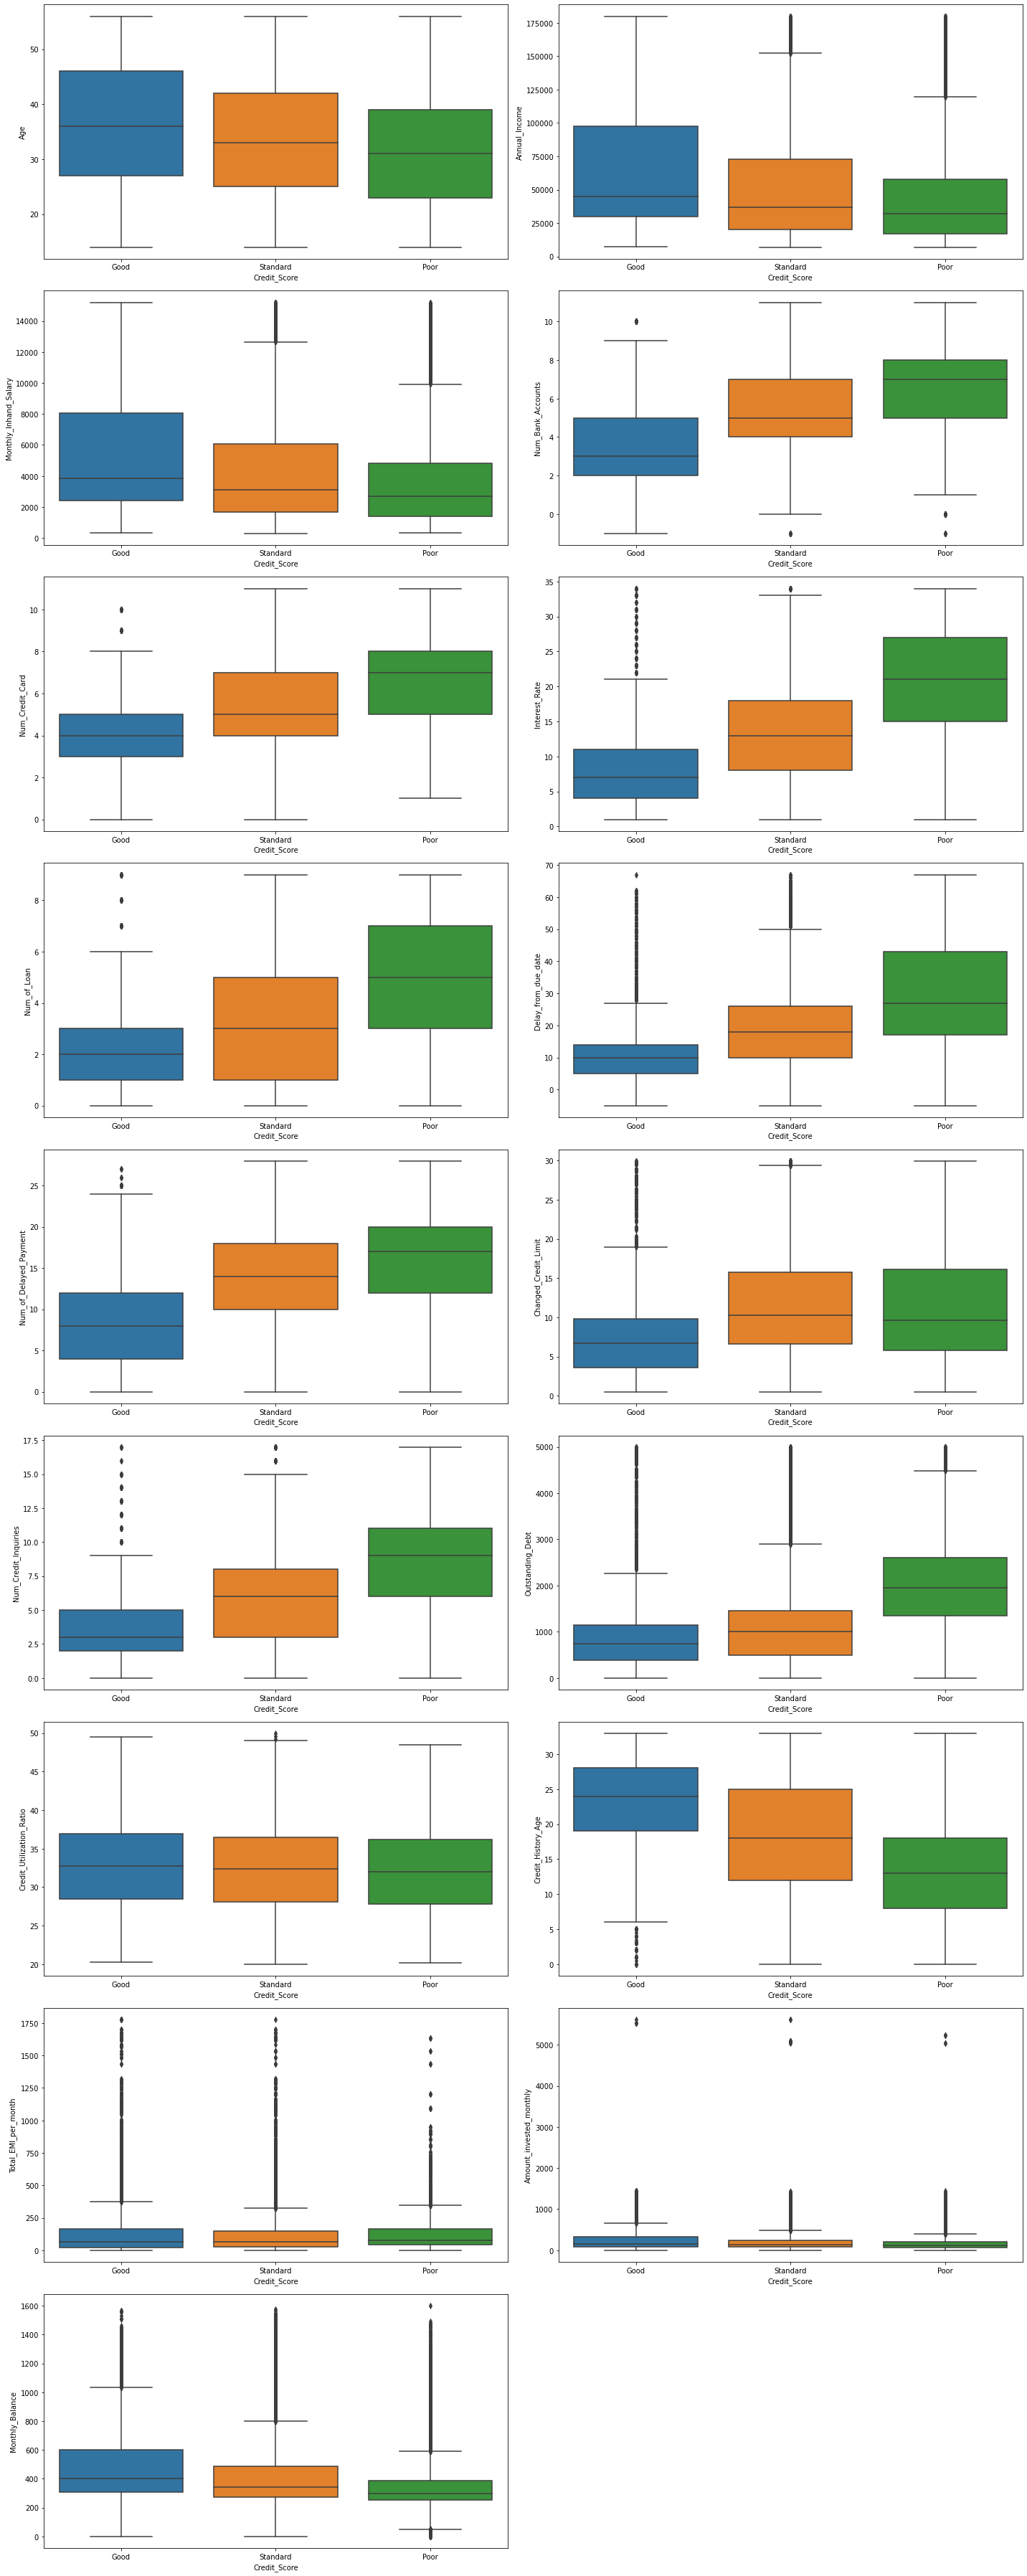

In [161]:
# Making multiple boxplots
rows=9
cols=2
counter=1
plt.rcParams['figure.figsize']=[20,50]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='Credit_Score',y=i,data=df)
    counter+=1
plt.tight_layout()
plt.show()

In [162]:
df.select_dtypes(include=object).columns # For categorical columns

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [163]:
cats=['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour']# Categorical columns

In [164]:
len(cats) # Checking the number of graphs to be made

5

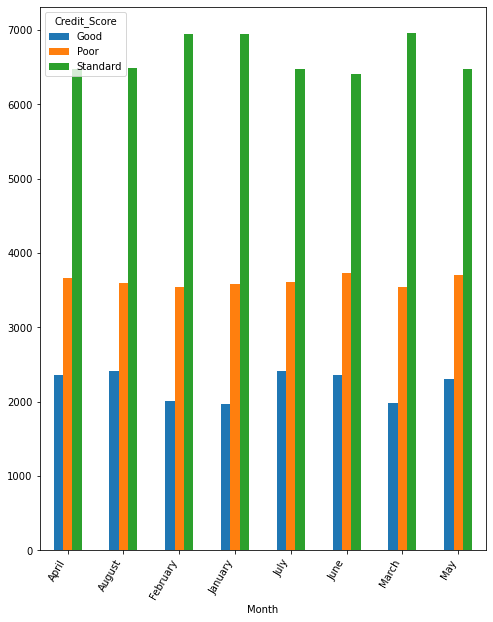

In [165]:
plt.rcParams['figure.figsize']=[8,10]
pd.crosstab(df.Month,df.Credit_Score).plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

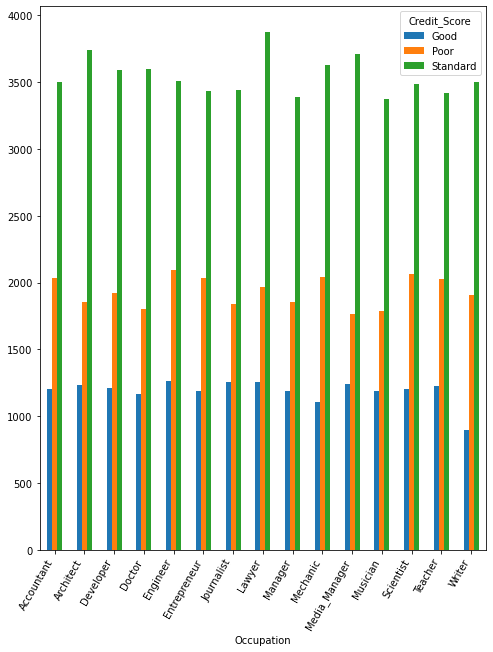

In [166]:
pd.crosstab(df.Occupation,df.Credit_Score).plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

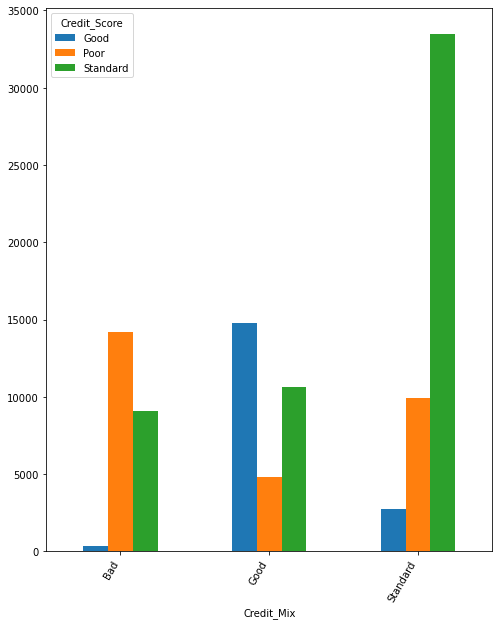

In [167]:
pd.crosstab(df.Credit_Mix,df.Credit_Score).plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

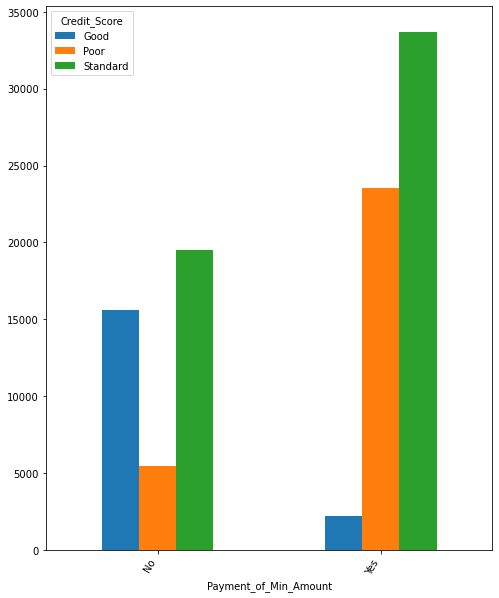

In [168]:
pd.crosstab(df.Payment_of_Min_Amount,df.Credit_Score).plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

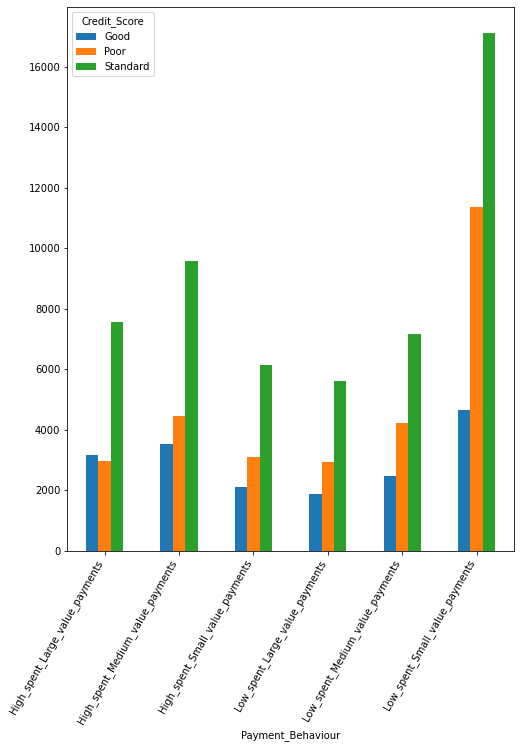

In [169]:
pd.crosstab(df.Payment_Behaviour,df.Credit_Score).plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

## Insights from the Bivariate graphs

* Younger People tend to have a poorer credit score compared to middle aged and older people
* According to the boxplot, more anuual income means better crdit score
* People with lower monthly inhand salary have a poorer credit score
* People with poorer credit score seem to have more number of bank accounts
* People with poorer credit score seem to have more number of crdit card
* People with poorer credit score seem to be paying more interest rate
* People with poorer credit seems to have more number of loans
* People with poorer credit score seem to have more delays
* People with standard and poor credit score seem to have more prominent changed credit limit
* People with poorer credit score seem to have more number of credit inquiries
* People with poorer credit score seem to have more outstanding debt
* Credit Utilization ratio seems to be uniform over all credit scores
* People with a better credit score seem to have a higher credit history age
* Total emi per month seems to be almost uniform over all credit scores
* People with better credit scores seem to be have a higher investment monthly
* People with better credit scores seem to have a higher monthly balance
* Across every month there are more number of standard credit scores than good and poor
* Across proffesion, credit scores seem to be standard as well most of the time
* People with poor credit mix have poor credit score usually, good credit leads to good credit score and standard credit mix leads to standard credit score
* Payment of minimum amount is usually done by people of poor and standard credit score
* low spent, small value payments seems to be most common in in standard credit score

# Feature Engineering, Splitting and Scaling of Data

In [194]:
df.columns=df.columns.str.replace('_','') #Removing underscores from column names for ease of use

In [195]:
df2=df.copy() # Creating a shallow copy of our main dataframe

In [196]:
# We will bin the month column into first quater,2nd quater,3rd quater, and 4th quarter.
df2.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [197]:
firstq=['January', 'February', 'March']
secondq=['April', 'May', 'June']
thirdq=['July','August', 'September']

In [198]:
# Function to return quater according to month encountered
def return_quarter(x):
    if x in firstq:
        return 'First Quarter'
    elif x in secondq:
        return 'Second Quarter'
    elif x in thirdq:
        return 'Third Quarter'
    else:
        return 'Fourth Quarter'
df2.Month=df2.Month.apply(return_quarter)

In [199]:
# We would now label the Credit score
# Poor would become 0, standard would become 1 and good will become 2
df2.CreditScore.unique()

array(['Good', 'Standard', 'Poor', nan], dtype=object)

In [200]:
df2.CreditScore=df2.CreditScore.map({'Poor':0,'Standard':1,'Good':2})# Encoding the target variable

In [201]:
df2.CreditScore.unique()

array([ 2.,  1.,  0., nan])

In [202]:
# We would now create dummy variables(one hot encoding method)
# Then we would split the data and then scale them 
df3=pd.get_dummies(df2,drop_first=True)# Creating dummy variables

In [203]:
# Since we already know the size of the train and test data we would use the iloc indexing to split them
df_train=df3.iloc[:100000]

In [204]:
df_test=df3.iloc[100000:] # Test data

In [205]:
df_test.drop(columns='CreditScore',inplace=True) #Dropping the target variable from the test set

In [206]:
df2.select_dtypes(np.number).drop(columns='CreditScore').columns

Index(['Age', 'AnnualIncome', 'MonthlyInhandSalary', 'NumBankAccounts',
       'NumCreditCard', 'InterestRate', 'NumofLoan', 'Delayfromduedate',
       'NumofDelayedPayment', 'ChangedCreditLimit', 'NumCreditInquiries',
       'OutstandingDebt', 'CreditUtilizationRatio', 'CreditHistoryAge',
       'TotalEMIpermonth', 'Amountinvestedmonthly', 'MonthlyBalance'],
      dtype='object')

In [207]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df_train.loc[:,df2.select_dtypes(np.number).drop(columns='CreditScore').columns]=sc.fit_transform(df_train.loc[:,df2.select_dtypes(np.number).drop(columns='CreditScore').columns])

In [208]:
df_test.loc[:,df2.select_dtypes(np.number).drop(columns='CreditScore').columns]=sc.transform(df_test.loc[:,df2.select_dtypes(np.number).drop(columns='CreditScore').columns])

In [209]:
# We saw that the datatype of our target variable is float
# So we will change it to int
df_train.CreditScore=df_train.CreditScore.astype('int')

In [211]:
# Now we will now define our X_train,X_test,Y_train
x_train=df_train.drop(columns='CreditScore')
y_train=df_train.CreditScore
x_test=df_test

In [214]:
x_train # Train set

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,Occupation_Teacher,Occupation_Writer,CreditMix_Good,CreditMix_Standard,PaymentofMinAmount_Yes,PaymentBehaviour_High_spent_Medium_value_payments,PaymentBehaviour_High_spent_Small_value_payments,PaymentBehaviour_Low_spent_Large_value_payments,PaymentBehaviour_Low_spent_Medium_value_payments,PaymentBehaviour_Low_spent_Small_value_payments
0,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.111111,0.250000,0.365332,...,0,0,1,0,0,0,1,0,0,0
1,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.055556,0.178571,0.365332,...,0,0,1,0,0,0,0,1,0,0
2,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.111111,0.250000,0.365332,...,0,0,1,0,0,0,0,0,1,0
3,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.138889,0.142857,0.365332,...,0,0,1,0,0,0,0,0,0,1
4,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.152778,0.178571,0.365332,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.261905,0.188593,0.205072,0.416667,0.545455,0.181818,0.222222,0.388889,0.250000,0.373134,...,0,0,1,0,0,0,0,0,0,0
99996,0.261905,0.188593,0.205072,0.416667,0.545455,0.181818,0.222222,0.319444,0.250000,0.373134,...,0,0,1,0,0,1,0,0,0,0
99997,0.261905,0.188593,0.205072,0.416667,0.545455,0.181818,0.222222,0.444444,0.214286,0.373134,...,0,0,1,0,0,0,0,0,0,0
99998,0.261905,0.188593,0.205072,0.416667,0.545455,0.181818,0.222222,0.347222,0.178571,0.373134,...,0,0,1,0,0,0,0,1,0,0


In [237]:
# Y_Train
y_train

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: CreditScore, Length: 100000, dtype: int32

In [238]:
# Test set
x_test

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,Occupation_Teacher,Occupation_Writer,CreditMix_Good,CreditMix_Standard,PaymentofMinAmount_Yes,PaymentBehaviour_High_spent_Medium_value_payments,PaymentBehaviour_High_spent_Small_value_payments,PaymentBehaviour_Low_spent_Large_value_payments,PaymentBehaviour_Low_spent_Medium_value_payments,PaymentBehaviour_Low_spent_Small_value_payments
100000,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.111111,0.250000,0.365332,...,0,0,1,0,0,0,0,0,0,1
100001,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.111111,0.321429,0.365332,...,0,0,1,0,0,1,0,0,0,0
100002,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.055556,0.142857,0.365332,...,0,0,1,0,0,0,0,0,1,0
100003,0.214286,0.069997,0.102087,0.333333,0.363636,0.060606,0.444444,0.125000,0.178571,0.365332,...,0,0,1,0,0,1,0,0,0,0
100004,0.333333,0.160953,0.183501,0.250000,0.363636,0.151515,0.111111,0.111111,0.035714,0.166893,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.333333,0.075135,0.109138,0.916667,0.727273,0.848485,0.555556,0.527778,0.892857,0.604138,...,0,0,0,0,1,0,0,0,0,1
149996,0.261905,0.188593,0.205072,0.416667,0.545455,0.181818,0.222222,0.347222,0.178571,0.373134,...,0,0,1,0,0,0,0,0,0,1
149997,0.261905,0.188593,0.205072,0.416667,0.545455,0.181818,0.222222,0.388889,0.178571,0.373134,...,0,0,1,0,0,0,0,1,0,0
149998,0.261905,0.188593,0.205072,0.416667,0.545455,0.181818,0.222222,0.361111,0.214286,0.373134,...,0,0,1,0,0,0,1,0,0,0
